К = 1, MSE = 0.025952976855929333
К = 2, MSE = 0.025952976855929333
К = 3, MSE = 0.025952976855929333
К = 4, MSE = 0.025952976855929333
К = 5, MSE = 0.025952976855929333


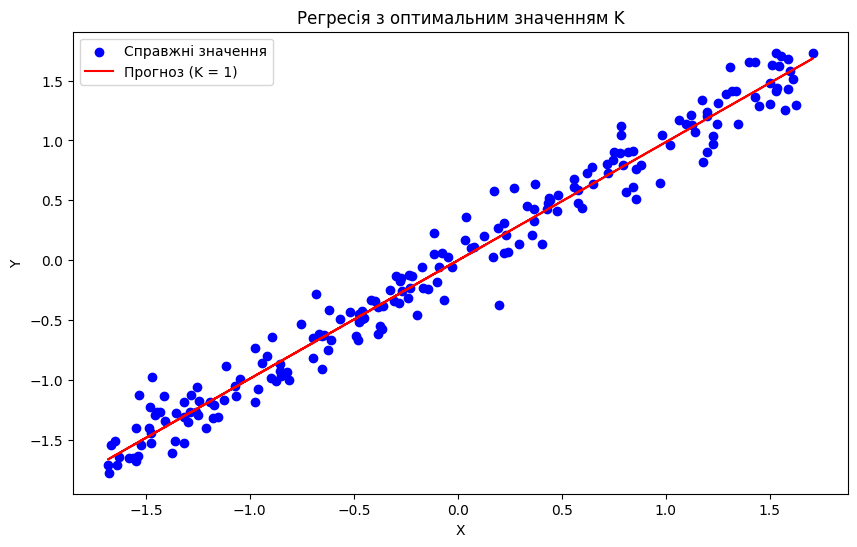

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Згенерувати випадковий набір даних та нормалізувати значення
n = 1000  # Кількість значень
X = np.random.rand(n)  # Основна змінна
noise = 0.1 * np.random.randn(n)  # Випадковий шум
Y = 2 * X + 1 + noise
X = (X - X.mean()) / X.std()
Y = (Y - Y.mean()) / Y.std()

# Розділити дані на навчальну та тестову вибірки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Навчити К-регресор з різними значеннями К та знайти MSE для кожного K
K_values = [1, 2, 3, 4, 5]
mse_values = []

for K in K_values:
    model = LinearRegression()
    model.fit(X_train.reshape(-1, 1), Y_train)
    Y_pred = model.predict(X_test.reshape(-1, 1))
    mse = mean_squared_error(Y_test, Y_pred)
    mse_values.append(mse)
    print(f"К = {K}, MSE = {mse}")

# Вибрати найкраще значення K
best_K = K_values[np.argmin(mse_values)]

# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, color='blue', label='Справжні значення')
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), Y_train)
Y_pred = model.predict(X_test.reshape(-1, 1))
plt.plot(X_test, Y_pred, color='red', label=f'Прогноз (K = {best_K})')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Регресія з оптимальним значенням K')
plt.show()
